In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
nba = pd.read_csv('data/nba_2013.csv')

In [3]:
# Point guards
point_guards = nba[nba['pos'] == 'PG'].copy()

# Points per game
point_guards['ppg'] = point_guards['pts'] / point_guards['g']

# Assist Turnover Ratio
point_guards = point_guards[point_guards['tov'] != 0]
point_guards['atr'] = point_guards['ast'] / point_guards['tov']

Text(0,0.5,'Assist Turnover Ratio')

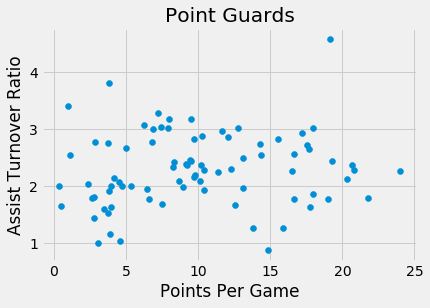

In [5]:
plt.scatter(point_guards['ppg'], point_guards['atr'])
plt.title('Point Guards')
plt.xlabel('Points Per Game')
plt.ylabel('Assist Turnover Ratio')

#### K-means algorithm step by step:

Setup K-Means is an iterative algorithm that switches between recalculating the centroid of each cluster and the players that belong to that cluster. To start, select 5 players at random and assign their coordinates as the initial centroids of the just created clusters.

Step 1 (Assign Points to Clusters) For each player, calculate the Euclidean distance between that player's coordinates, or values for atr & ppg, and each of the centroids' coordinates. Assign the player to the cluster whose centroid is the closest to, or has the lowest Euclidean distance to, the player's values.

Step 2 (Update New Centroids of the Clusters) For each cluster, compute the new centroid by calculating the arithmetic mean of all of the points (players) in that cluster. We calculate the arithmetic mean by taking the average of all of the X values (atr) and the average of all of the Y values (ppg) of the points in that cluster.

Iterate Repeat steps 1 & 2 until the clusters are no longer moving and have converged.

In [104]:
num_clusters = 5
random_initial_points = np.random.choice(point_guards.index, num_clusters)
centroids = point_guards.loc[random_initial_points].copy()

Text(0,0.5,'Assist Turnover Ratio')

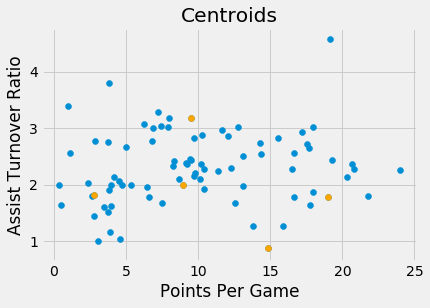

In [56]:
plt.scatter(point_guards['ppg'], point_guards['atr'])
plt.scatter(centroids['ppg'], centroids['atr'], c='orange')
plt.title('Centroids')
plt.xlabel('Points Per Game')
plt.ylabel('Assist Turnover Ratio')

In [106]:
use_columns = ['ppg', 'atr']
centroids = centroids[use_columns].reset_index(drop=True)

In [189]:
def assign_to_cluster(row):
    player = row[centroids.columns]
    player = pd.DataFrame(player).T.reset_index(drop=True)
    player = player.reindex(index=centroids.index, method='ffill')
    distances = np.sqrt(((centroids - player) ** 2).sum(axis=1))
    return distances.idxmin()

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

Text(0,0.5,'Assist Turnover Ratio')

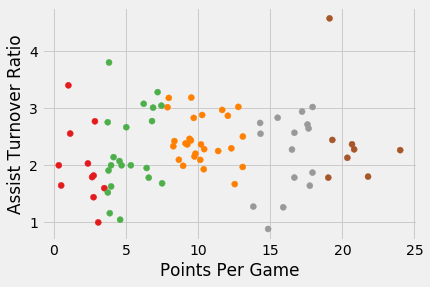

In [190]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c=point_guards['cluster'], cmap='Set1')
plt.xlabel('Points Per Game')
plt.ylabel('Assist Turnover Ratio')

In [176]:
def centroids_to_dict(centroids):
    d = centroids.to_dict(orient='index')
    return {
        k: [v['ppg'], v['atr']]
        for k, v in d.items()
    }

In [188]:
def recalculate_centroids(df):
    new_centroid = df.groupby('cluster')[['ppg', 'atr']].mean()
    return new_centroid

centroids = recalculate_centroids(point_guards)

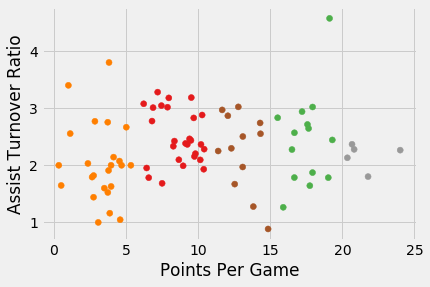

In [195]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg', 'atr']])
point_guards['cluster'] = kmeans.labels_

def visualize_clusters(point_guards):
    plt.scatter(point_guards['ppg'], point_guards['atr'], c=point_guards['cluster'], cmap='Set1')
    plt.xlabel('Points Per Game')
    plt.ylabel('Assist Turnover Ratio')
    plt.show()
    
visualize_clusters(point_guards)